In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [3]:
# Sampling rate in Hz
fs = 1024

# Signal frequency in Hz
f = 10

# Signal duration in seconds
T = 1

# Wave type
wave_type = 'sine'

# Offset
offset = 0

# Noise
noise = False

# FFT settings
fftSize = 2048
fftWindow = False

In [4]:
# Create array of samples
t = np.linspace(0, T, T * fs, endpoint=False)

if wave_type == 'sine':
    x = np.sin(2 * np.pi * f * t)
elif wave_type == 'square':
    x = np.sign(np.sin(2 * np.pi * f * t))
    x = np.convolve(x, np.ones(5) / 5, mode='same')
elif wave_type == 'square_lpf':
    x = np.sign(np.sin(2 * np.pi * f * t))
elif wave_type == 'triangle':
    x = 2 * np.arcsin(np.sin(2 * np.pi * f * t)) / np.pi
else:
    raise ValueError('Invalid wave type')

In [5]:
# Add noise
if noise:
    x += np.random.normal(0, 0.1, len(x))

# Add offset
x += offset

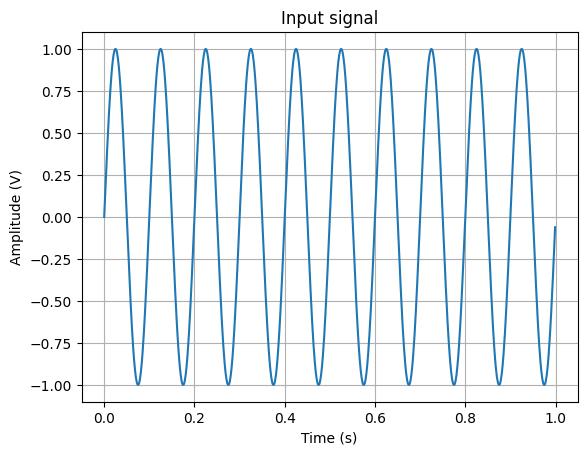

In [6]:
# Plot
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('Input signal')
plt.plot(t, x)

In [7]:
# Apply window
if fftWindow:
    x_processed = x * np.hanning(len(x))
    plt.grid()
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.title('Windowed signal')
    plt.plot(t, x_processed)
else:
    x_processed = x

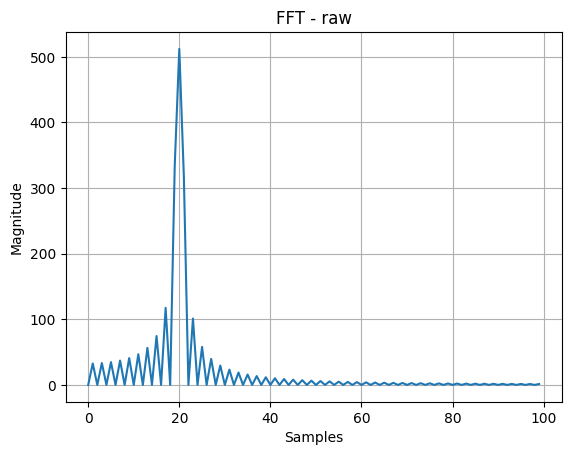

In [18]:
# FFT
X = np.fft.rfft(x_processed, fftSize)
X = np.abs(X)

# FFT plot - raw
plt.grid()
plt.title('FFT - raw')
plt.xlabel('Samples')
plt.ylabel('Magnitude')
plt.plot(X[:100])

In [12]:
print(np.argmax(X))

20


In [ ]:
hps_spectrum = X[:]
#for harmonic in range(2, 5 + 1):
#    downsampled = [X[i] for i in range(0, len(X), harmonic)]
#    hps_spectrum = [hps_spectrum[i] * downsampled[i] for i in range(len(downsampled))]

for harmonic in range(2, 5 + 1):
    for i in range(0, len(X) // harmonic):
        hps_spectrum[i] *= X[i * harmonic]

print(np.argmax(hps_spectrum))

513


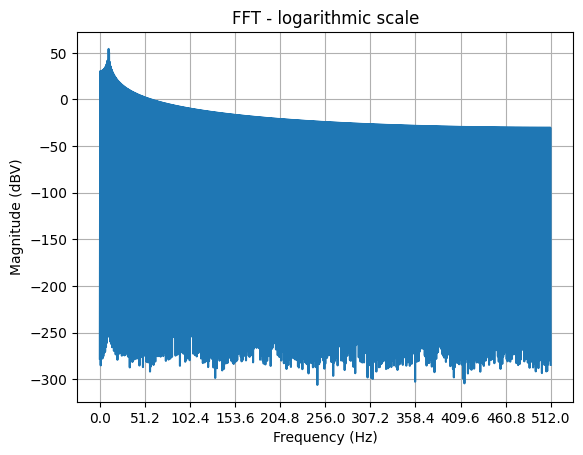

In [ ]:
# FFT plot - logarithmic scale
plt.grid()
plt.title('FFT - logarithmic scale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dBV)')
plt.xticks(np.arange(0, fs / 2 + 1, fs / 20))
plt.plot(np.linspace(0, fs / 2, len(X)), 20.0 * np.log10(X))

In [ ]:
# Preallocate, there can't be more maxima than half the size of `x`
midpoints = np.empty(len(X) // 2, dtype=np.intp)
left_edges = np.empty(len(X) // 2, dtype=np.intp)
right_edges = np.empty(len(X) // 2, dtype=np.intp)
m = 0  # Pointer to the end of valid area in allocated arrays

i = 1  # Pointer to current sample, first one can't be maxima
i_max =  len(X) - 1  # Last sample can't be maxima
while i < i_max:
    # Test if previous sample is smaller
    if X[i - 1] < X[i]:
        i_ahead = i + 1  # Index to look ahead of current sample

        # Find next sample that is unequal to x[i]
        while i_ahead < i_max and X[i_ahead] == X[i]:
            i_ahead += 1

        # Maxima is found if next unequal sample is smaller than x[i]
        if X[i_ahead] < X[i]:
            left_edges[m] = i
            right_edges[m] = i_ahead - 1
            midpoints[m] = (left_edges[m] + right_edges[m]) // 2
            m += 1
            # Skip samples that can't be maximum
            i = i_ahead
    i += 1

peak_step = 5
peak_factor = 2

for j in range(0, m - 1):
    if (X[midpoints[j] - peak_step] * peak_factor) < X[midpoints[j]] and (X[midpoints[j] + peak_step] * peak_factor) < X[midpoints[j]]:
        print(f"Peak at {midpoints[j]} with value {X[midpoints[j]]:.3f} (m = {j})")

Peak at 1 with value 32.666 (m = 0)
Peak at 3 with value 33.335 (m = 1)
Peak at 5 with value 34.758 (m = 2)
Peak at 7 with value 37.135 (m = 3)
Peak at 9 with value 40.861 (m = 4)
Peak at 11 with value 46.721 (m = 5)
Peak at 13 with value 56.431 (m = 6)
Peak at 17 with value 117.449 (m = 8)
Peak at 20 with value 512.000 (m = 9)
Peak at 23 with value 101.080 (m = 10)
Peak at 27 with value 39.639 (m = 12)
Peak at 29 with value 29.575 (m = 13)
Peak at 31 with value 23.251 (m = 14)
Peak at 33 with value 18.933 (m = 15)
Peak at 35 with value 15.814 (m = 16)
Peak at 37 with value 13.465 (m = 17)
Peak at 39 with value 11.641 (m = 18)
Peak at 41 with value 10.188 (m = 19)
Peak at 43 with value 9.008 (m = 20)
Peak at 45 with value 8.034 (m = 21)
Peak at 47 with value 7.218 (m = 22)
Peak at 49 with value 6.526 (m = 23)
Peak at 51 with value 5.934 (m = 24)
Peak at 53 with value 5.422 (m = 25)
Peak at 55 with value 4.977 (m = 26)
Peak at 57 with value 4.587 (m = 27)
Peak at 59 with value 4.242 (m 

IndexError: index 1026 is out of bounds for axis 0 with size 1025

In [ ]:
peak_step = 10
peak_factor = 2

for i in range(peak_step, len(X) - peak_step, peak_step):
    if X[i] >= (peak_factor * X[i - peak_step]) and X[i] >= (peak_factor * X[i + peak_step]):
        max = X[i]
        maxIdx = i
        for j in range(i - (peak_step // 2), i + (peak_step // 2)):
            if X[j] > max:
                max = X[j]
                maxIdx = j
        print(f'Peak at {maxIdx * fs / fftSize :.3f}Hz (index {maxIdx})')

Peak at 10.000Hz (index 10)


In [ ]:
# Find peaks
peaksIdx, _ = find_peaks(X, prominence=10)
peaks = peaksIdx * fs / fftSize

# Fundamental frequency
f_est = peaks[0]
print(f"Fundamental frequency: {f_est:.3f}Hz (index {peaksIdx[0]})")

Fundamental frequency: 10.000Hz (index 10)


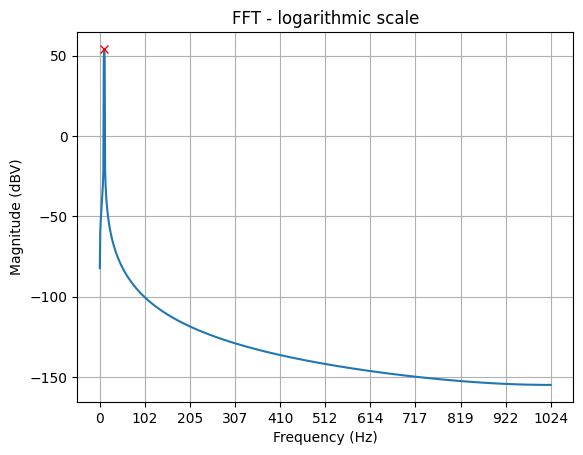

In [ ]:
# Plot FFT
plt.grid()
plt.title('FFT - logarithmic scale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dBV)')
plt.xticks(np.arange(0, fs / 2 + 1, fs / 20))
plt.plot(np.linspace(0, fs / 2, len(X)), 20.0 * np.log10(X))

plt.plot(peaks, 20.0 * np.log10(X[peaksIdx]), 'xr')

In [ ]:
# Autocorrelation
acf = np.correlate(x, x, 'full')

# Get only the second half
acf = acf[len(acf) // 2:]
# Normalize
acf /= np.max(acf)

In [ ]:
# Find peaks
acfPeaksIdx, _ = find_peaks(acf, height=0.1, distance=10)

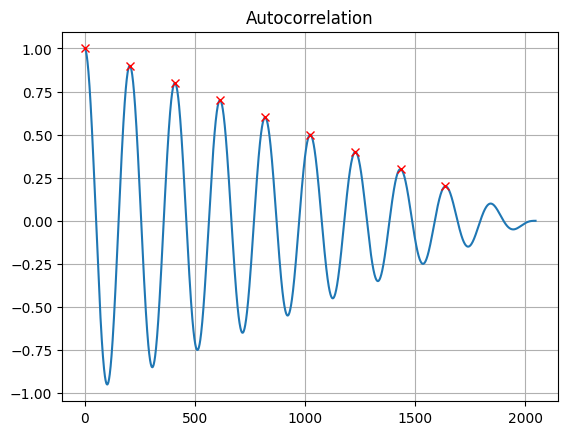

In [ ]:
# Plot
plt.grid()
plt.title('Autocorrelation')
plt.plot(acf)
plt.plot(0, acf[0], "xr")
plt.plot(acfPeaksIdx, acf[acfPeaksIdx], "xr")

In [ ]:
# Estimate frequency
f_est = fs / acfPeaksIdx[0]
print(f"Estimated frequency: {f_est}Hz")

Estimated frequency: 9.990243902439024Hz
